<a href="https://colab.research.google.com/github/kgy1008/Data-Science-Analysis/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown https://drive.google.com/uc?id=1bBHHdWwRsOBO0MiqrDWag3v4Zsroea7V

Downloading...
From: https://drive.google.com/uc?id=1bBHHdWwRsOBO0MiqrDWag3v4Zsroea7V
To: /content/medical.csv
100% 9.14M/9.14M [00:00<00:00, 35.9MB/s]


In [ ]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#데이터셋 불러오기
df =pd.read_csv('medical.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


In [ ]:
#데이터 컬럼명 확인하기
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
#전반적인 데이터 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


In [ ]:
#컬럼별로 결측치 확인하기 :isnull().any()
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
SMS_received      False
No-show           False
dtype: bool

In [ ]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [ ]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [ ]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [ ]:
#통계값을 이용하여 이상치 확인하기
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


In [ ]:
#이상치 제거하기
df=df[df.Age>=0]

In [ ]:
#이상치 제거되었는지 확인하기
df.Age.min()

0

In [ ]:
#수치형으로 데이터타입 변환하기 :map()사용
df['No-show']=df['No-show'].map({'Yes':1, 'No':0})

In [ ]:
#타입변환이 되었는지 확인하기
df['No-show'].value_counts()

0    88207
1    22319
Name: No-show, dtype: int64

In [ ]:
#datetime으로 형 변환하기:'AppointmentDay','ScheduledDay'
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(2)
memory usage: 8.4+ MB


In [ ]:
df['AppointmentDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110526, dtype: datetime64[ns, UTC]

In [ ]:
df['ScheduledDay']

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110526, dtype: datetime64[ns, UTC]

In [ ]:
#예약하고 병원을 방문하는 기간 구하기 :일수 차이로 계산(dt.dayofyear)
df['waitingDay']=df['AppointmentDay'].dt.dayofyear-df['ScheduledDay'].dt.dayofyear
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
 9   waitingDay      110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(5), object(2)
memory usage: 9.3+ MB


In [ ]:
#df['waitingDay]의 통계값 확인하기
df['waitingDay'].describe()

count    110526.000000
mean          9.979046
std          15.607516
min        -223.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         146.000000
Name: waitingDay, dtype: float64

In [ ]:
#watingDay의 이상치 제거하기
df=df[df['waitingDay']>=0]

In [ ]:
df['waitingDay'].min()

0

<Axes: xlabel='Age'>

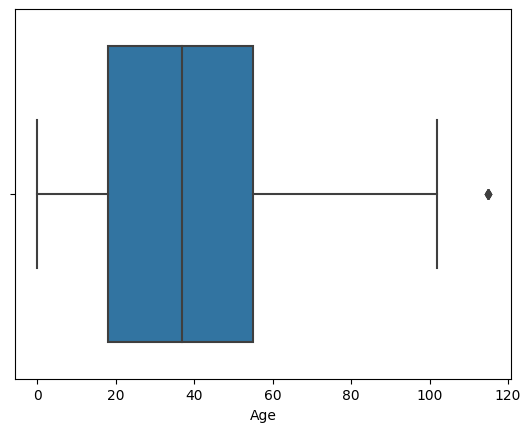

In [ ]:
#'Age' 이상치있는지 확인하기 : boxplot
sns.boxplot(data=df,x='Age')


In [ ]:
#이상치 제거하기
df=df[df.Age<=110]

<Axes: xlabel='Age'>

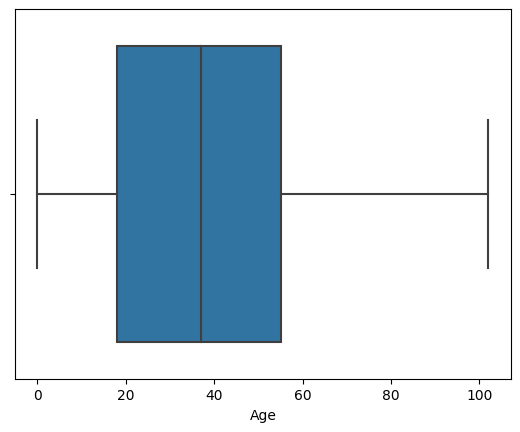

In [ ]:
#'Age' 이상치 확인하기 : boxplot
sns.boxplot(data=df,x='Age')

In [ ]:
df['waitingDay'].value_counts()

0      38561
2       6725
4       5290
1       5213
7       4906
       ...  
101        1
82         1
126        1
125        1
123        1
Name: waitingDay, Length: 123, dtype: int64

어떤 변수가 노쇼와
관련이 있는지를 파악하기

In [ ]:
#waiting_day와 ‘No-show'

In [ ]:
#당일예약 건 중에서 노쇼 비율 : wating_day==0

a= df[(df.waitingDay==0)]['waitingDay'].value_counts()
b = df[(df['waitingDay'] == 0) & (df['No-show'] == 1)]['waitingDay'].value_counts()
b/a

0    0.046472
Name: waitingDay, dtype: float64

In [ ]:
#예약한 시점부터 병원 방문 날까지 기다리는 일수에 따라 노쇼관련 여부 확인하기

In [ ]:
#노쇼데이터와 노쇼가 아닌 데이터로 나누기
no_show=df[df['No-show']==1]
show=df[df['No-show']==0]

In [ ]:
# waiting_day가 10일 이내인 데이터 저장하기
no1=no_show[no_show['waitingDay']<=10]['waitingDay']
show1=show[show['waitingDay']<=10]['waitingDay']

In [ ]:
no1

6         2
7         2
11        3
17        1
20        2
         ..
110484    4
110492    0
110496    2
110515    2
110516    1
Name: waitingDay, Length: 11112, dtype: int64

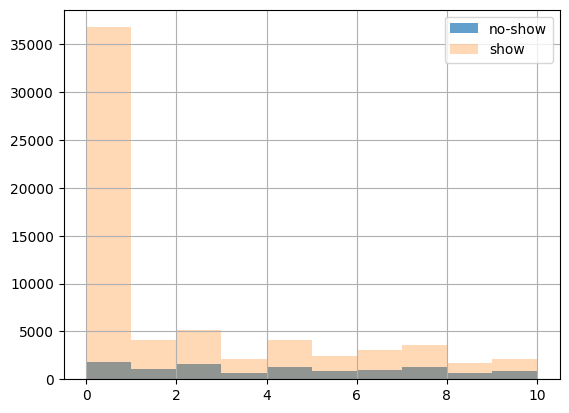

In [ ]:
#히스토그램으로 시각화하기
no1.hist(alpha=0.7, label='no-show')
show1.hist(alpha=0.3, label='show')
plt.legend()

In [ ]:
#예약잡은 날에 따른 노쇼 건수와 노쇼가 아닌 건수 비교하기

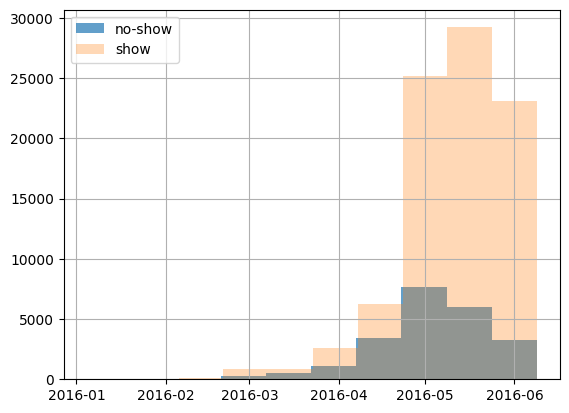

In [ ]:
no2=no_show['ScheduledDay']
show2=show['ScheduledDay']
no2.hist(alpha=0.7, label='no-show')
show2.hist(alpha=0.3, label='show')
plt.legend()

In [ ]:
#병원 방문일에 따른 노쇼 발생 건수와 그렇지 않은 건수 비교

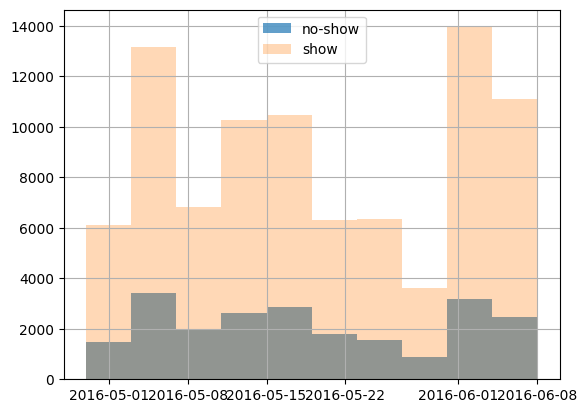

In [ ]:
no3=no_show['AppointmentDay']
show3=show['AppointmentDay']
no3.hist(alpha=0.7, label='no-show')
show3.hist(alpha=0.3, label='show')
plt.legend()

In [ ]:
#재방문 환자와 노쇼 :df에서

In [ ]:
#환자번호를 가지고 value_counts()를 구하면 환자별 예약횟수를 알수 있음, 상위10명만 확인하기:iloc사용
df.PatientId.value_counts().iloc[0:10]

8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
6.540000e+13    112
6.680000e+13    106
1.450000e+13    104
8.530000e+14    102
8.920000e+13    101
Name: PatientId, dtype: int64

<Axes: >

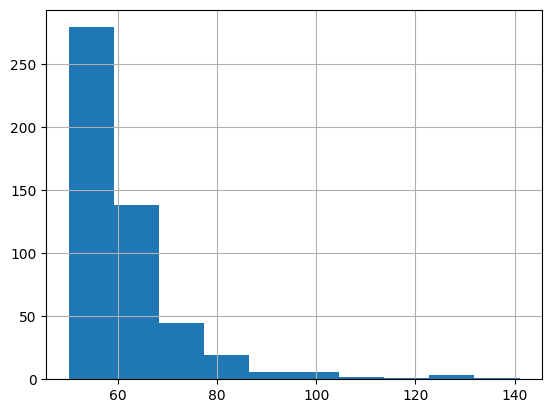

In [ ]:
#상위 500명 환자의 예약횟수 분포 확인하기
patient=df.PatientId.value_counts().iloc[0:500]
patient.hist()

한명당 최소 50번의 예약을 하고 최대 141회 예약을 한다.
가장 많은 예약은 50~60사이임
한 환자가 병원을 여러번 예약하는 것을 알수 있음

In [ ]:
#노쇼 환자별 watingDay 파악 : no_show데이터에서
  #50일 이상 기다린다면
no_show[no_show['waitingDay']>=50]['PatientId'].value_counts()

3.380000e+14    6
7.250000e+13    4
7.850000e+13    4
8.340000e+12    4
5.670000e+12    3
               ..
3.110000e+11    1
7.240000e+13    1
9.680000e+12    1
9.850000e+14    1
2.930000e+12    1
Name: PatientId, Length: 790, dtype: int64

In [ ]:
 #10일~19일
no_show[(20>no_show['waitingDay'])&(no_show['waitingDay']>=10)]['PatientId'].value_counts()

9.740000e+13    9
1.560000e+13    8
9.440000e+11    7
7.580000e+13    7
2.490000e+13    7
               ..
3.530000e+12    1
2.320000e+12    1
2.157992e+09    1
4.690000e+11    1
2.760000e+14    1
Name: PatientId, Length: 2296, dtype: int64

In [ ]:
 #1일~9일
 no_show[(10>no_show['waitingDay'])&(no_show['waitingDay']>=1)]['PatientId'].value_counts()

3.150000e+13    13
9.160000e+13    13
8.140000e+13    13
9.180000e+13    12
2.270000e+13    12
                ..
9.560000e+14     1
3.758423e+10     1
9.732838e+10     1
3.300000e+13     1
6.460000e+14     1
Name: PatientId, Length: 3106, dtype: int64

<Axes: xlabel='SMS_received', ylabel='waitingDay'>

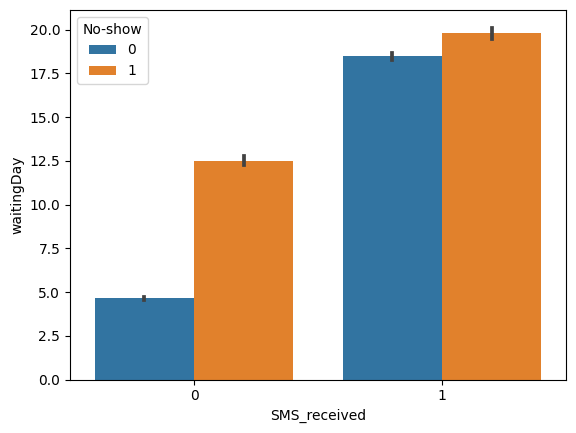

In [ ]:
#노쇼 여부와 SMS_receive,watindDay간의 관계 파악 :df에서
sns.barplot(data=df, y='waitingDay', x='SMS_received', hue='No-show')

<Axes: xlabel='No-show', ylabel='waitingDay'>

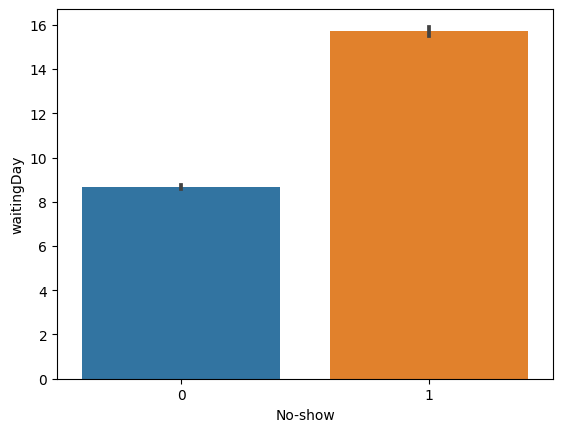

In [ ]:
sns.barplot(y='waitingDay',data=df,x='No-show')

In [ ]:
#SMS_received에 따른 ‘No-show’ 비율 파악
a=len(df[(df['SMS_received'] == 1) & (df['No-show'] == 1)])
b=len(df[(df['SMS_received'] == 0) & (df['No-show'] == 0)])
a/(a+b)

0.2756927591850556

In [ ]:
a=len(df[(df['SMS_received'] == 1) & (df['No-show'] == 1)])
b=len(df[(df['SMS_received'] == 1) & (df['No-show'] == 0)])
a/(a+b)

0.2756927591850556

In [ ]:
#얼마나 많은 환자가 예정된 날짜에 오지 않았는가?
no_show_count = df['No-show'].sum()
no_show_count

22292

<Axes: xlabel='Gender', ylabel='count'>

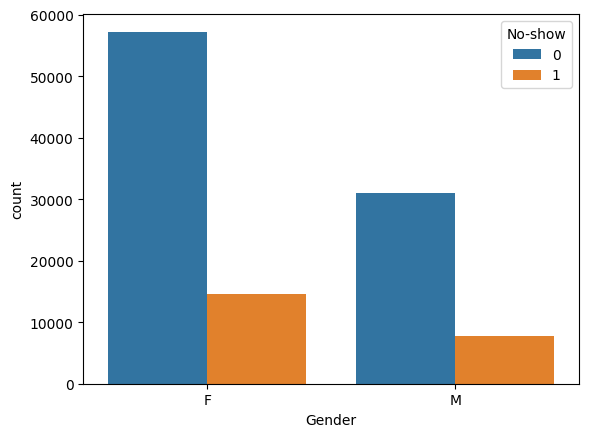

In [ ]:
#성별에 따른 노쇼 여부를 countplot을 이용하여 시각화해보자.
sns.countplot(x='Gender', hue='No-show', data=df)

In [ ]:
#이외에 다양한 방법으로 분석해 보고 결과를 작성하시오.

In [ ]:
#노쇼를 최소화하려면 어떻게 해야하는가?

1. 연령대에 따른 노쇼 분석

In [ ]:
#연령대 분류
age_bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [ ]:
#연령대에 따른 노쇼 평균
age_no_show = df.groupby('Age_Group')['No-show'].mean()
age_no_show

Age_Group
0-9        0.204090
10-19      0.251720
20-29      0.246641
30-39      0.217446
40-49      0.202732
50-59      0.174879
60-69      0.150539
70-79      0.151571
80-89      0.157016
90-99      0.201970
100-109    0.000000
Name: No-show, dtype: float64

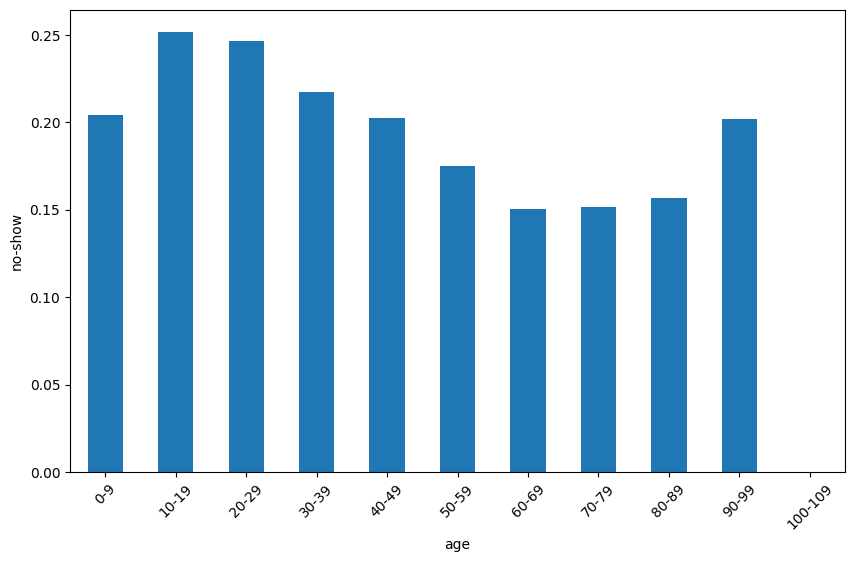

In [ ]:
#그래프
plt.figure(figsize=(10, 6))
age_no_show.plot(kind='bar')
plt.xlabel('age')
plt.ylabel('no-show')
plt.xticks(rotation=45)
plt.show()

2. 요일별 노쇼 분석

In [ ]:
#요일별 분석
df['AppointmentDayOfWeek'] = df['AppointmentDay'].dt.day_name()
weekday_no_show = df.groupby('AppointmentDayOfWeek')['No-show'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [ ]:
#출력
weekday_no_show

AppointmentDayOfWeek
Friday       0.212279
Monday       0.206385
Saturday     0.230769
Thursday     0.193401
Tuesday      0.200874
Wednesday    0.196630
Name: No-show, dtype: float64

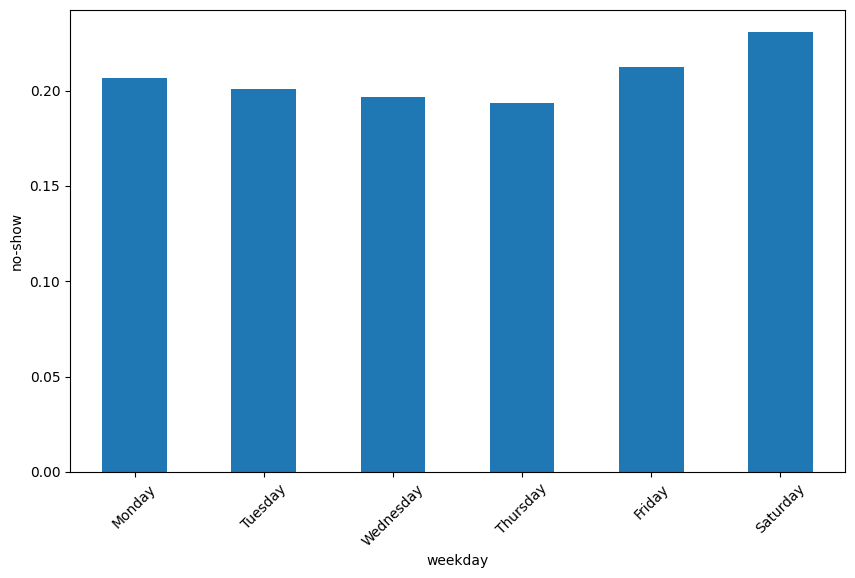

In [ ]:
plt.figure(figsize=(10, 6))
weekday_no_show[weekday_order].plot(kind='bar')
plt.xlabel('weekday')
plt.ylabel('no-show')
plt.xticks(rotation=45)
plt.show()